# Analysing The Climate Data

In [46]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import os
import matplotlib.pyplot as plt

In [47]:
# Get the current working directory
cwd = os.getcwd()
# List all files in the directory and filter for .csv files
csv_files = [f for f in os.listdir(cwd) if os.path.isfile(os.path.join(cwd, f)) and f.endswith('.csv')]
print(csv_files)

['Climate_aet_.csv', 'Climate_def_.csv', 'Climate_pdsi_.csv', 'Climate_pet_.csv', 'Climate_pr_.csv', 'Climate_ro_.csv', 'Climate_soil_.csv', 'Climate_srad_.csv', 'Climate_swe_.csv', 'Climate_tmmn_.csv', 'Climate_tmmx_.csv', 'Climate_vap_.csv', 'Climate_vpd_.csv', 'Climate_vs_.csv']


In [48]:
dates = ['20150101', '20150201', '20150301', '20150401',
         '20150501', '20150601', '20150701', '20150801',
         '20150901', '20151001', '20151101', '20151201']

feature_names = [x.split('_')[1] for x in csv_files]
feature_names

['aet',
 'def',
 'pdsi',
 'pet',
 'pr',
 'ro',
 'soil',
 'srad',
 'swe',
 'tmmn',
 'tmmx',
 'vap',
 'vpd',
 'vs']

In [49]:
# random number between 0 and 1660
random_number = np.random.randint(0, 1686)
print("Random number: ", random_number)
df = pd.read_csv(csv_files[0])
random_row = df.iloc[random_number]
PID = random_row['Point_ID']
print("Point ID: ", PID)

Random number:  46
Point ID:  44582862


In [50]:
rows = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df = df[df['Point_ID'] == PID]
    df = df.iloc[:, 1:13]
    rows.append(df.values[0])

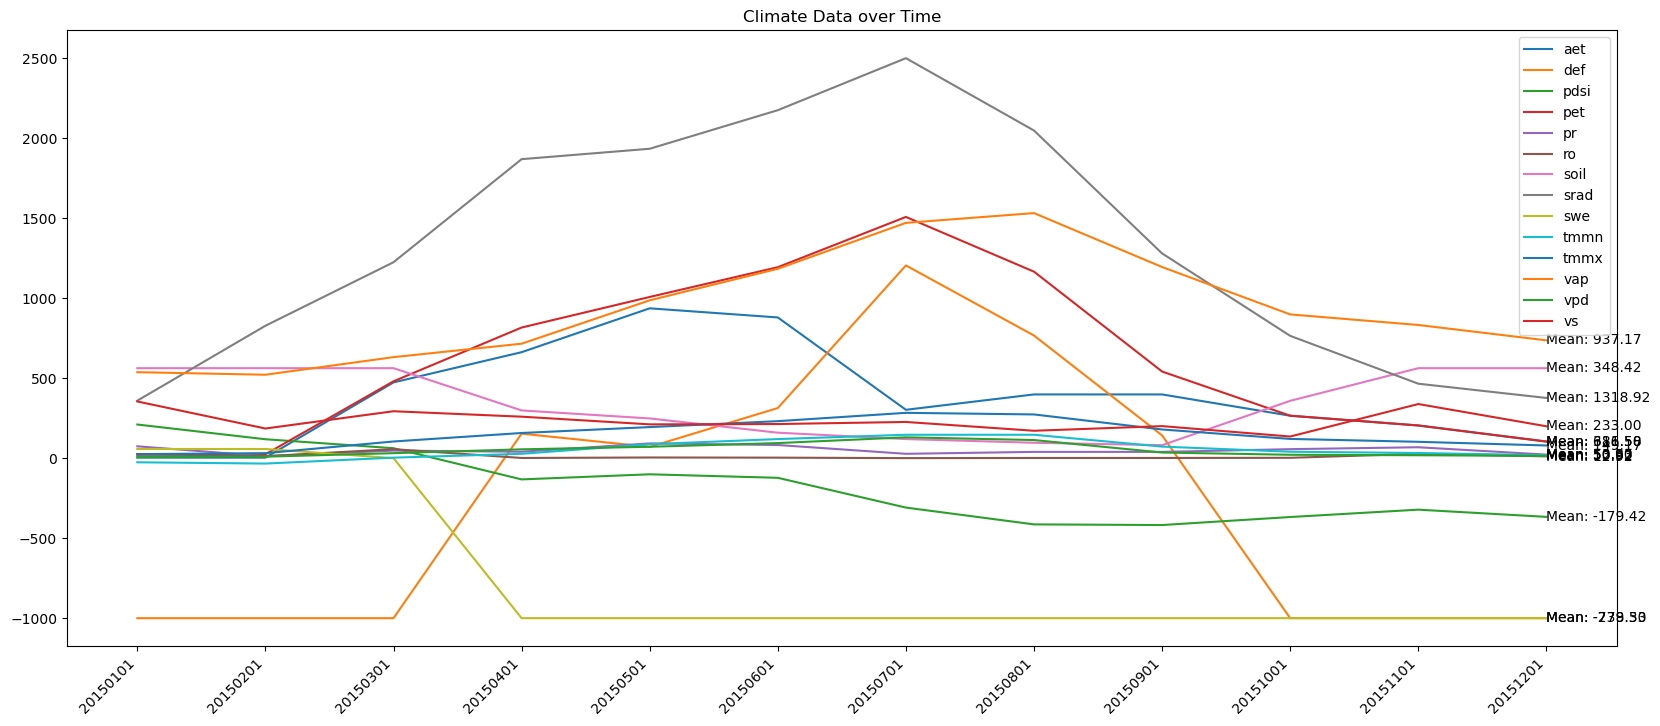

In [51]:
plt.figure(figsize=(20, 8))
# Plot the data
for i, arr in enumerate(rows):
    plt.plot(dates, arr, label=feature_names[i])
    # Calculate and add the mean value label
    mean_val = np.mean(arr)
    
    plt.text(dates[-1], arr[-1], f"Mean: {mean_val:.2f}", va='center', ha='left', color='black')

# Set the plot title and legend
plt.title('Climate Data over Time')
plt.legend(loc='upper right')
plt.xticks(dates, rotation=45, ha='right')
# Show the plot
plt.show()

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Normalizing the Data

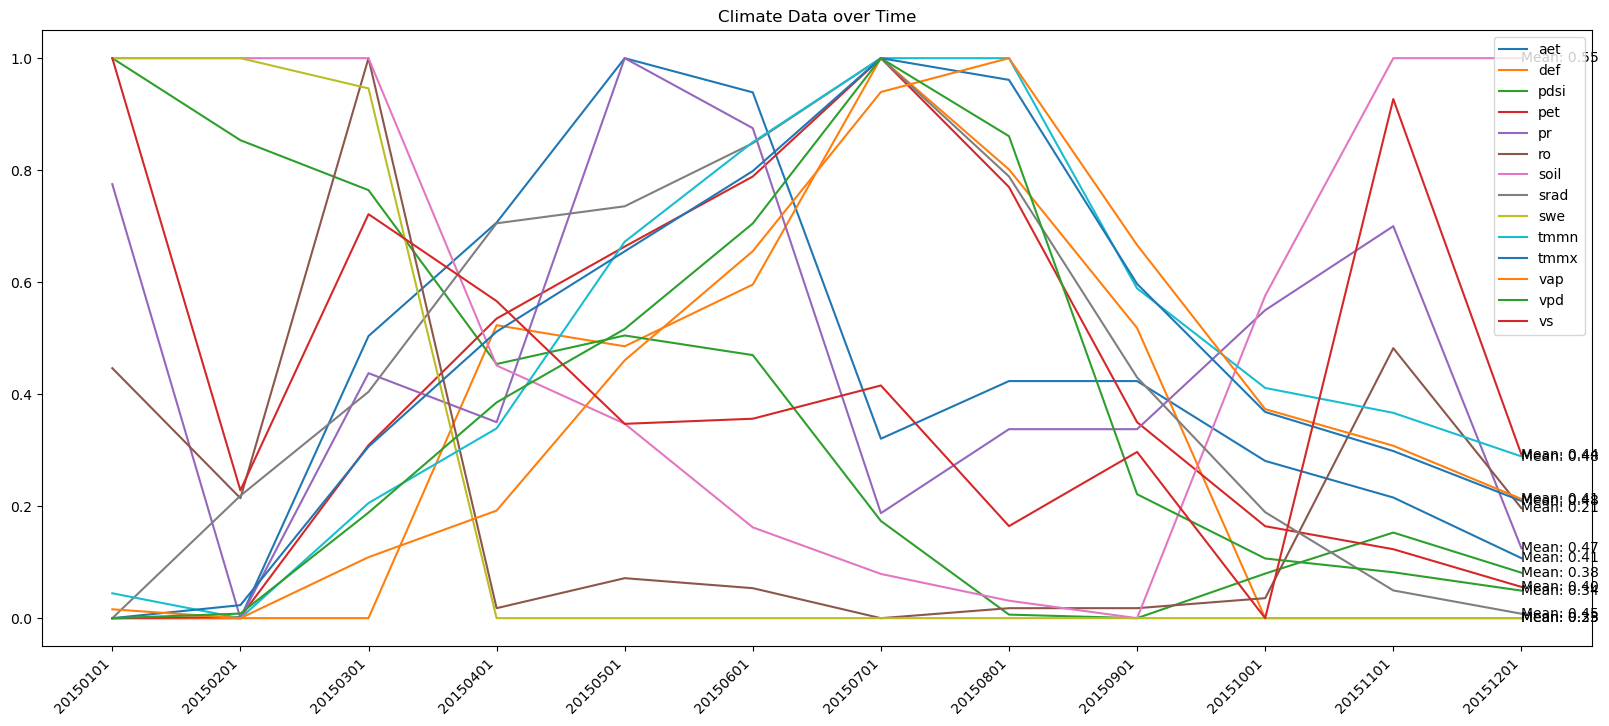

In [53]:
plt.figure(figsize=(20, 8))
# Plot the data
for i, arr in enumerate(rows):
    mm = MinMaxScaler()
    mm.fit(arr.reshape(-1, 1))
    arr= mm.transform(arr.reshape(-1, 1))
    arr = arr.reshape(-1)
    
    plt.plot(dates, arr, label=feature_names[i])
    # Calculate and add the mean value label
    mean_val = np.mean(arr)
    plt.text(dates[-1], arr[-1], f"Mean: {mean_val:.2f}", va='center', ha='left', color='black')

# Set the plot title and legend
plt.title('Climate Data over Time')
plt.legend(loc='upper right')
plt.xticks(dates, rotation=45, ha='right')
# Show the plot
plt.show()

## Standardaizing the data

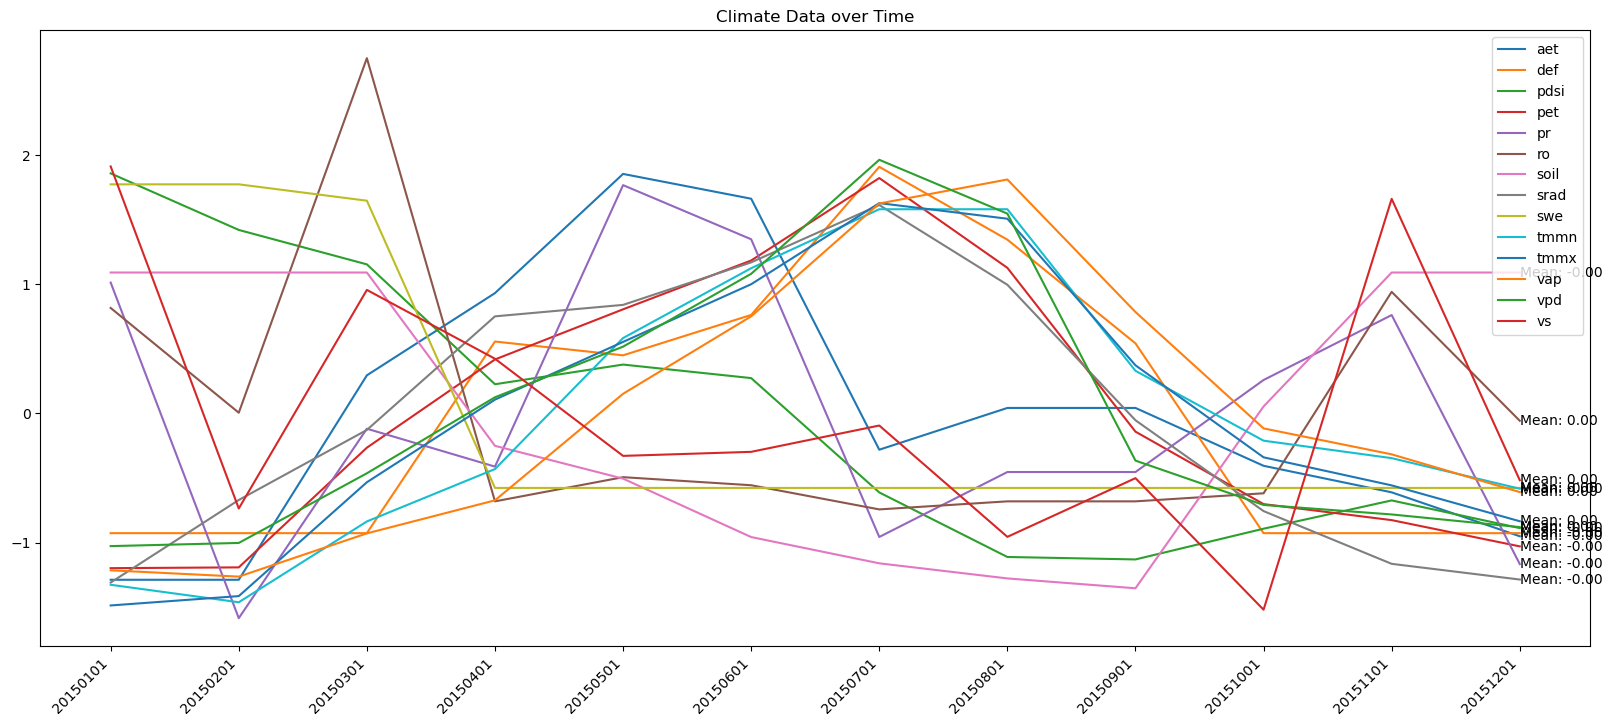

In [54]:
plt.figure(figsize=(20, 8))
# Plot the data
for i, arr in enumerate(rows):
    ss = StandardScaler()
    ss.fit(arr.reshape(-1, 1))
    arr= ss.transform(arr.reshape(-1, 1))
    arr = arr.reshape(-1)
    
    plt.plot(dates, arr, label=feature_names[i])
    # Calculate and add the mean value label
    mean_val = np.mean(arr)
    plt.text(dates[-1], arr[-1], f"Mean: {mean_val:.2f}", va='center', ha='left', color='black')

# Set the plot title and legend
plt.title('Climate Data over Time')
plt.legend(loc='upper right')
plt.xticks(dates, rotation=45, ha='right')
# Show the plot
plt.show()

## Interpreting the data
- swe data seems to be `-999` most of the time.

<span style="color:#ff4444;">This will result in low correlation with the OC, -999 values should be replace with a proper placeholder value, when feeding it in to the LSTM</span> 

- Maybe mean vlue of others instead of -999


In [55]:
corr_dict_w_999 = {}
print("Correlation: ")
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_ts = df.iloc[:, 1:13]
    df['ts_mean'] = df_ts.mean(axis=1)
    correlation = df['OC'].corr(df['ts_mean'])
    print(f"{csv_file.split('_')[1]} and OC: {correlation:.2f}")
    corr_dict_w_999[csv_file.split('_')[1]] = correlation

Correlation: 
aet and OC: 0.21
def and OC: -0.23
pdsi and OC: 0.12
pet and OC: -0.20
pr and OC: 0.26
ro and OC: 0.16
soil and OC: 0.07
srad and OC: -0.08
swe and OC: 0.08
tmmn and OC: -0.06
tmmx and OC: -0.22
vap and OC: -0.11
vpd and OC: -0.21
vs and OC: 0.13


In [56]:
# Creating Correlation Dcitionary without -999 values
corr_dict_wo_999 = {}
print("Correlation: ")
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_ts = df.iloc[:, 1:13]
    df_ts.replace(-999, np.nan, inplace=True) # convering -999 to NaN
    df['ts_mean'] = df_ts.mean(axis=1, skipna=True) # calculating mean ignoring NaN
    correlation = df['OC'].corr(df['ts_mean'])
    print(f"{csv_file.split('_')[1]} and OC: {correlation:.2f}")
    corr_dict_wo_999[csv_file.split('_')[1]] = correlation
    


Correlation: 
aet and OC: 0.26
def and OC: -0.25
pdsi and OC: 0.12
pet and OC: -0.19
pr and OC: 0.26
ro and OC: 0.25
soil and OC: 0.07
srad and OC: -0.08
swe and OC: 0.12
tmmn and OC: -0.14
tmmx and OC: -0.22
vap and OC: -0.11
vpd and OC: -0.21
vs and OC: 0.13


### Plotting the correlation

C:\Users\moi3n\AppData\Local\Temp\ipykernel_27420\997089954.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels1, rotation=45)
C:\Users\moi3n\AppData\Local\Temp\ipykernel_27420\997089954.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels2, rotation=45)


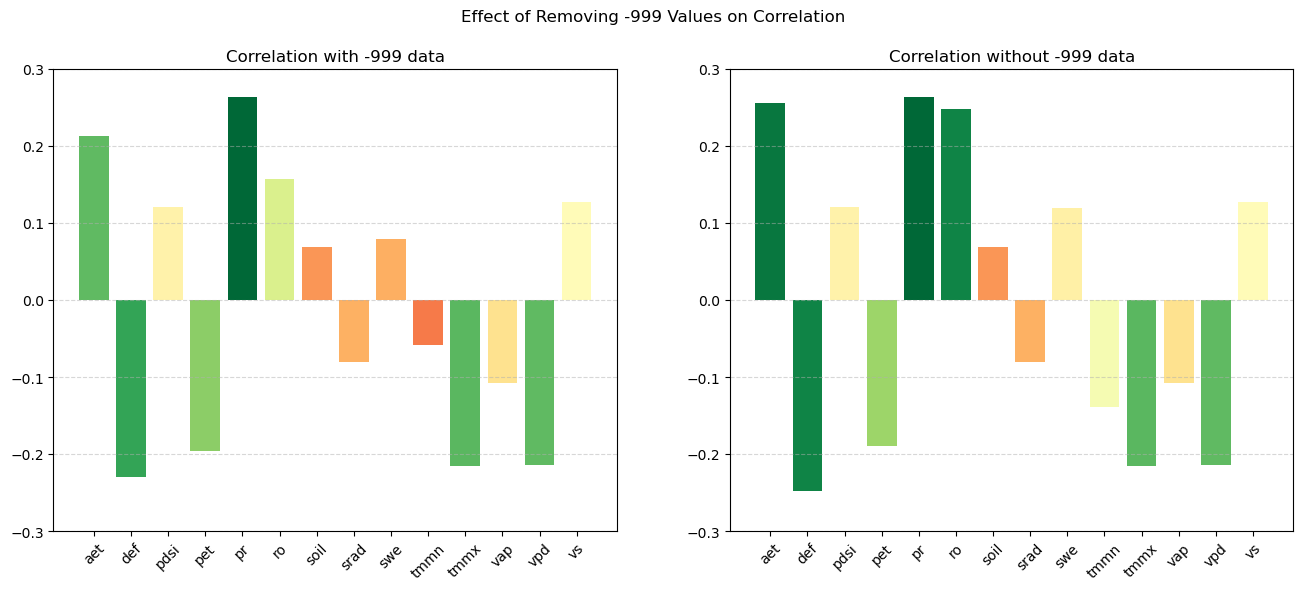

In [57]:
# Create the first plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

# Plot the first bar plot
d1 = corr_dict_w_999
data1 = list(d1.items())
labels1, values1 = zip(*data1)
norm1 = plt.Normalize(0, max(values1))
colors1 = plt.cm.RdYlGn(norm1(np.abs(values1)))
ax1.bar(labels1, values1, color=colors1)
ax1.set_ylim([-0.3, 0.3])
ax1.set_xticklabels(labels1, rotation=45)
ax1.set_title('Correlation with -999 data')
ax1.grid(True, axis='y', linestyle='--', alpha=0.5, which='both')

# Plot the second bar plot
d2 = corr_dict_wo_999
data2 = list(d2.items())
labels2, values2 = zip(*data2)
norm2 = plt.Normalize(0, max(values2))
colors2 = plt.cm.RdYlGn(norm2(np.abs(values2)))
ax2.bar(labels2, values2, color=colors2)
ax2.set_ylim([-0.3, 0.3])
ax2.set_xticklabels(labels2, rotation=45)
ax2.set_title('Correlation without -999 data')
ax2.grid(True, axis='y', linestyle='--', alpha=0.5, which='both')

# Set the overall plot title
plt.suptitle('Effect of Removing -999 Values on Correlation')

# Show the plot
plt.show()

- Should we use all the TS data or just the ones that are correlated with the OC?
- as we saw in the last section, the `swe` has one of the lowest correlation with the OC, since it is mostly noise data.

## Correlation between the `Max` TS data and the OC Excluding the `-999` Data
`TRMM` was showing a low correlation with the OC, when we were averaging, but it has a `higher correlation` when we are using the `max` value.

In [58]:
corr_dict_max = {}
print("Correlation: ")
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_ts = df.iloc[:, 1:13]
    df_ts.replace(-999, np.nan, inplace=True)
    df['ts_mean'] = df_ts.max(axis=1, skipna=True)
    correlation = df['OC'].corr(df['ts_mean'])
    corr_dict_max[csv_file.split('_')[1]] = correlation


Correlation: 


## Correlation between the `Min` TS data and the OC Excluding the `-999` Data

In [59]:
corr_dict_min = {}
print("Correlation: ")
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_ts = df.iloc[:, 1:13]
    df_ts.replace(-999, np.nan, inplace=True)
    df['ts_mean'] = df_ts.min(axis=1, skipna=True)
    correlation = df['OC'].corr(df['ts_mean'])
    corr_dict_min[csv_file.split('_')[1]] = correlation


Correlation: 


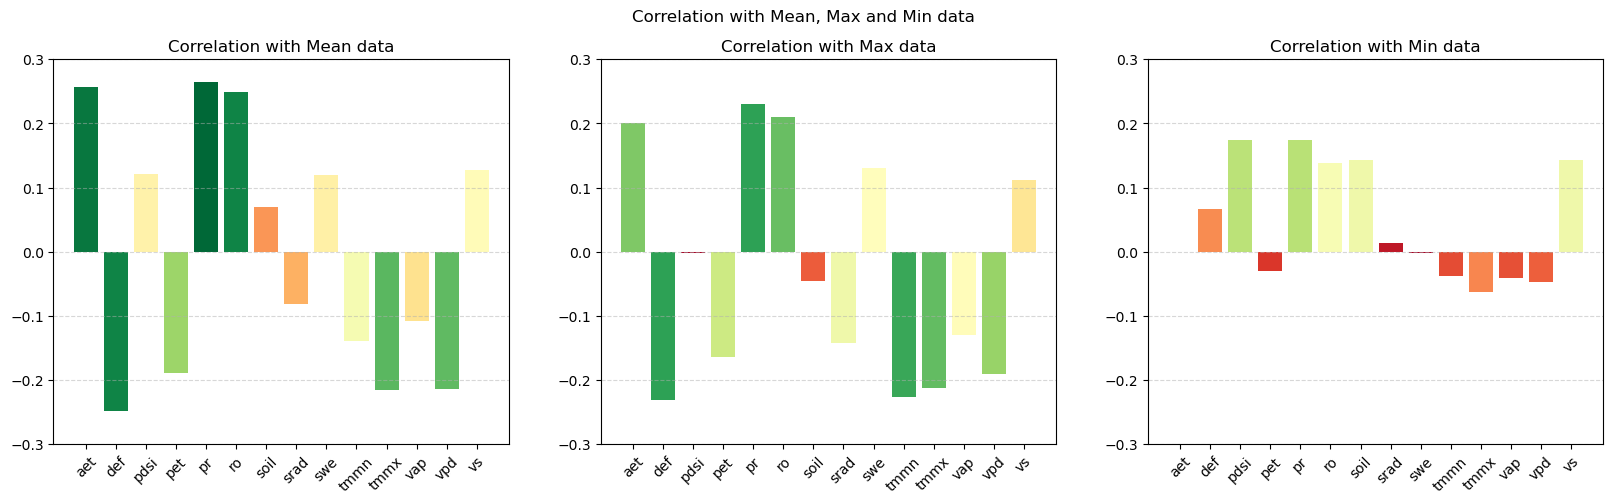

In [72]:
# Create the first plot
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20,5))

# Plot the first bar plot
d1 = corr_dict_wo_999
data1 = list(d1.items())
labels1, values1 = zip(*data1)
norm1 = plt.Normalize(0, max(values1))
colors1 = plt.cm.RdYlGn(norm1(np.abs(values1)))
ax1.bar(labels1, values1, color=colors1)
ax1.set_ylim([-0.3, 0.3])
ax1.set_xticks(range(len(labels1))) # I don;t know why but it removes the warning of the next line
ax1.set_xticklabels(labels1, rotation=45)
ax1.set_title('Correlation with Mean data')
ax1.grid(True, axis='y', linestyle='--', alpha=0.5, which='both')

# Plot the second bar plot
d2 = corr_dict_max
data2 = list(d2.items())
labels2, values2 = zip(*data2)
norm2 = plt.Normalize(0, max(values1))
colors2 = plt.cm.RdYlGn(norm2(np.abs(values2)))
ax2.bar(labels2, values2, color=colors2)
ax2.set_ylim([-0.3, 0.3])
ax2.set_xticks(range(len(labels2))) # I don;t know why but it removes the warning of the next line
ax2.set_xticklabels(labels2, rotation=45)
ax2.set_title('Correlation with Max data')
ax2.grid(True, axis='y', linestyle='--', alpha=0.5, which='both')

# Plot the second bar plot
d3 = corr_dict_min
data3 = list(d3.items())
labels3, values3 = zip(*data3)
norm3 = plt.Normalize(0, max(values1))
colors3 = plt.cm.RdYlGn(norm3(np.abs(values3)))
ax3.bar(labels3, values3, color=colors3)
ax3.set_ylim([-0.3, 0.3])
ax3.set_xticks(range(len(labels3))) # I don;t know why but it removes the warning of the next line
ax3.set_xticklabels(labels3, rotation=45)
ax3.set_title('Correlation with Min data')
ax3.grid(True, axis='y', linestyle='--', alpha=0.5, which='both')

# Set the overall plot title
plt.suptitle('Correlation with Mean, Max and Min data')

# Show the plot
plt.show()

## converinng all the data for to (1,sequence, features) shape 

In [61]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import os
import matplotlib.pyplot as plt

In [62]:
# Get the current working directory
cwd = os.getcwd()
# List all files in the directory and filter for .csv files
csv_files = [f for f in os.listdir(cwd) if os.path.isfile(os.path.join(cwd, f)) and f.endswith('.csv')]
print(csv_files)

['Climate_aet_.csv', 'Climate_def_.csv', 'Climate_pdsi_.csv', 'Climate_pet_.csv', 'Climate_pr_.csv', 'Climate_ro_.csv', 'Climate_soil_.csv', 'Climate_srad_.csv', 'Climate_swe_.csv', 'Climate_tmmn_.csv', 'Climate_tmmx_.csv', 'Climate_vap_.csv', 'Climate_vpd_.csv', 'Climate_vs_.csv']


In [63]:
feature_names = [x.split('_')[1] for x in csv_files]

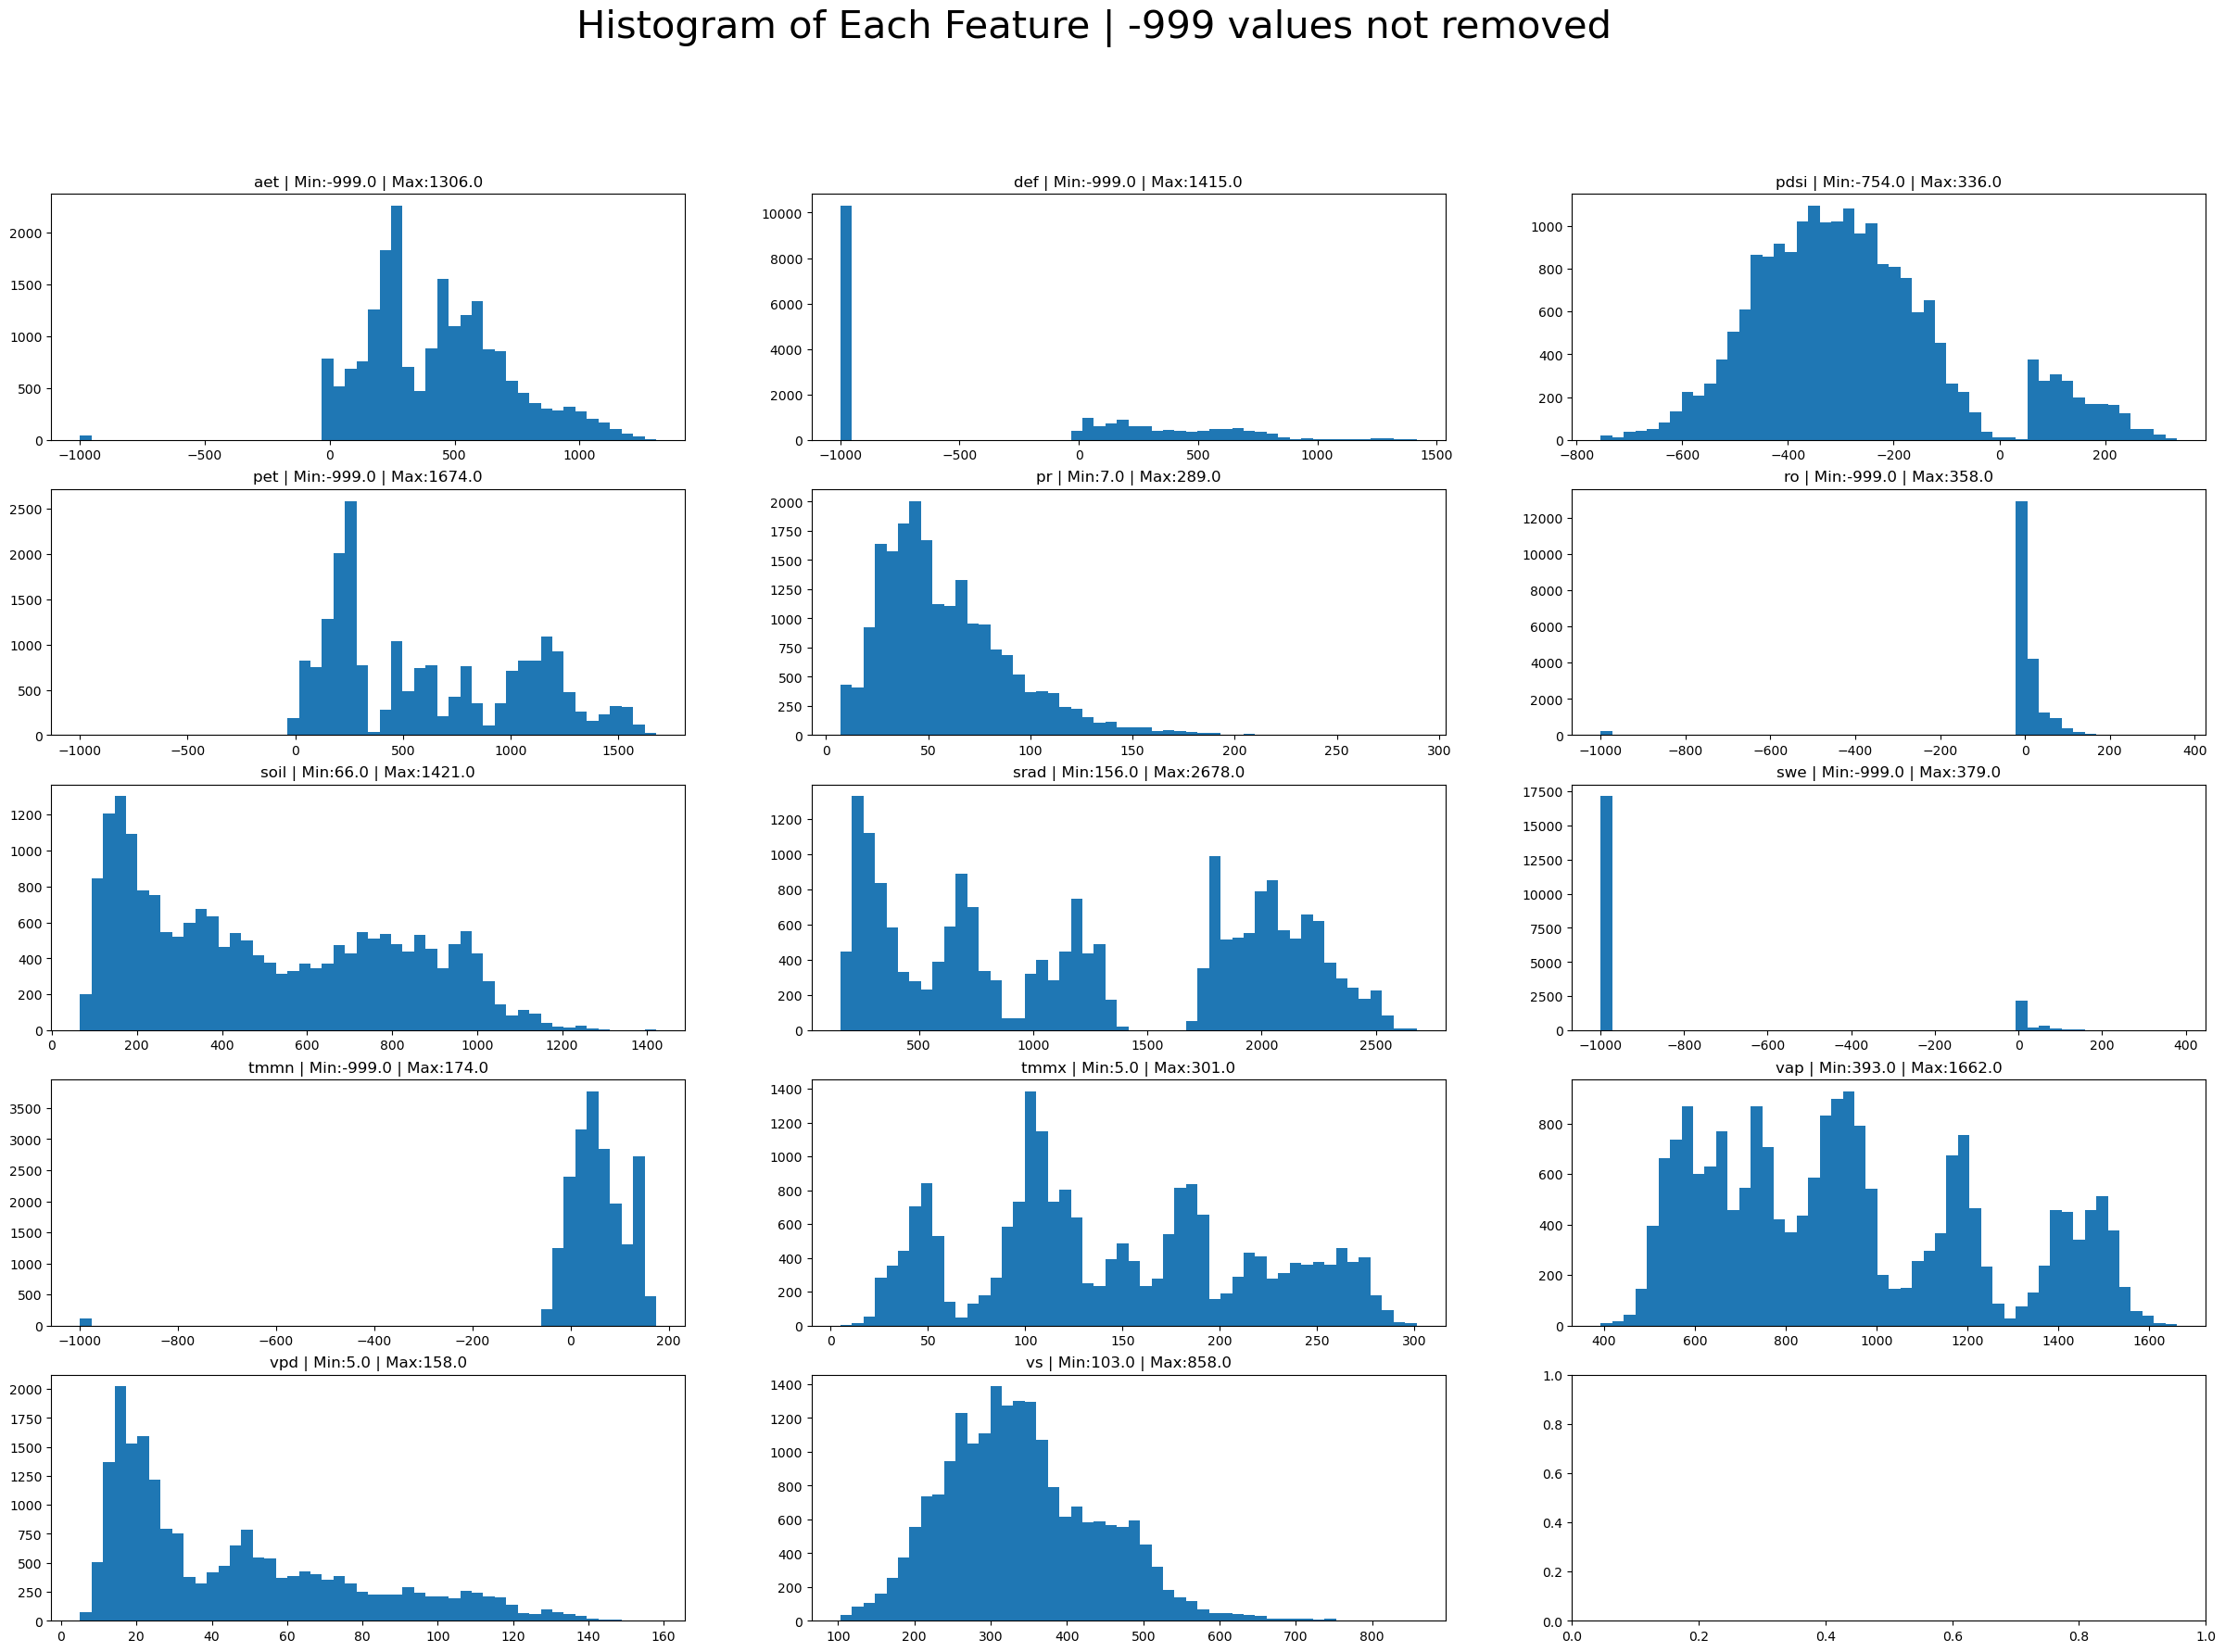

In [64]:
vals_list = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df = df.iloc[:, 1:13]
    vals = df.values.reshape(-1)
    vals_list.append(vals)
len(vals_list)


# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(30, 20))

# Loop through each array and plot its histogram in a different subplot
for i in range(len(vals_list)):
    ax = axs[i // 3, i % 3]  # Select the appropriate subplot
    ax.hist(vals_list[i], bins=50)  # Create the histogram in the subplot
    ax.set_title(f'{feature_names[i]} | Min:{np.min(vals_list[i])} | Max:{np.max(vals_list[i])}')  # Add a title to the subplot

# Add a global title and show the plot
fig.suptitle('Histogram of Each Feature | -999 values not removed', fontsize=30)
plt.show()

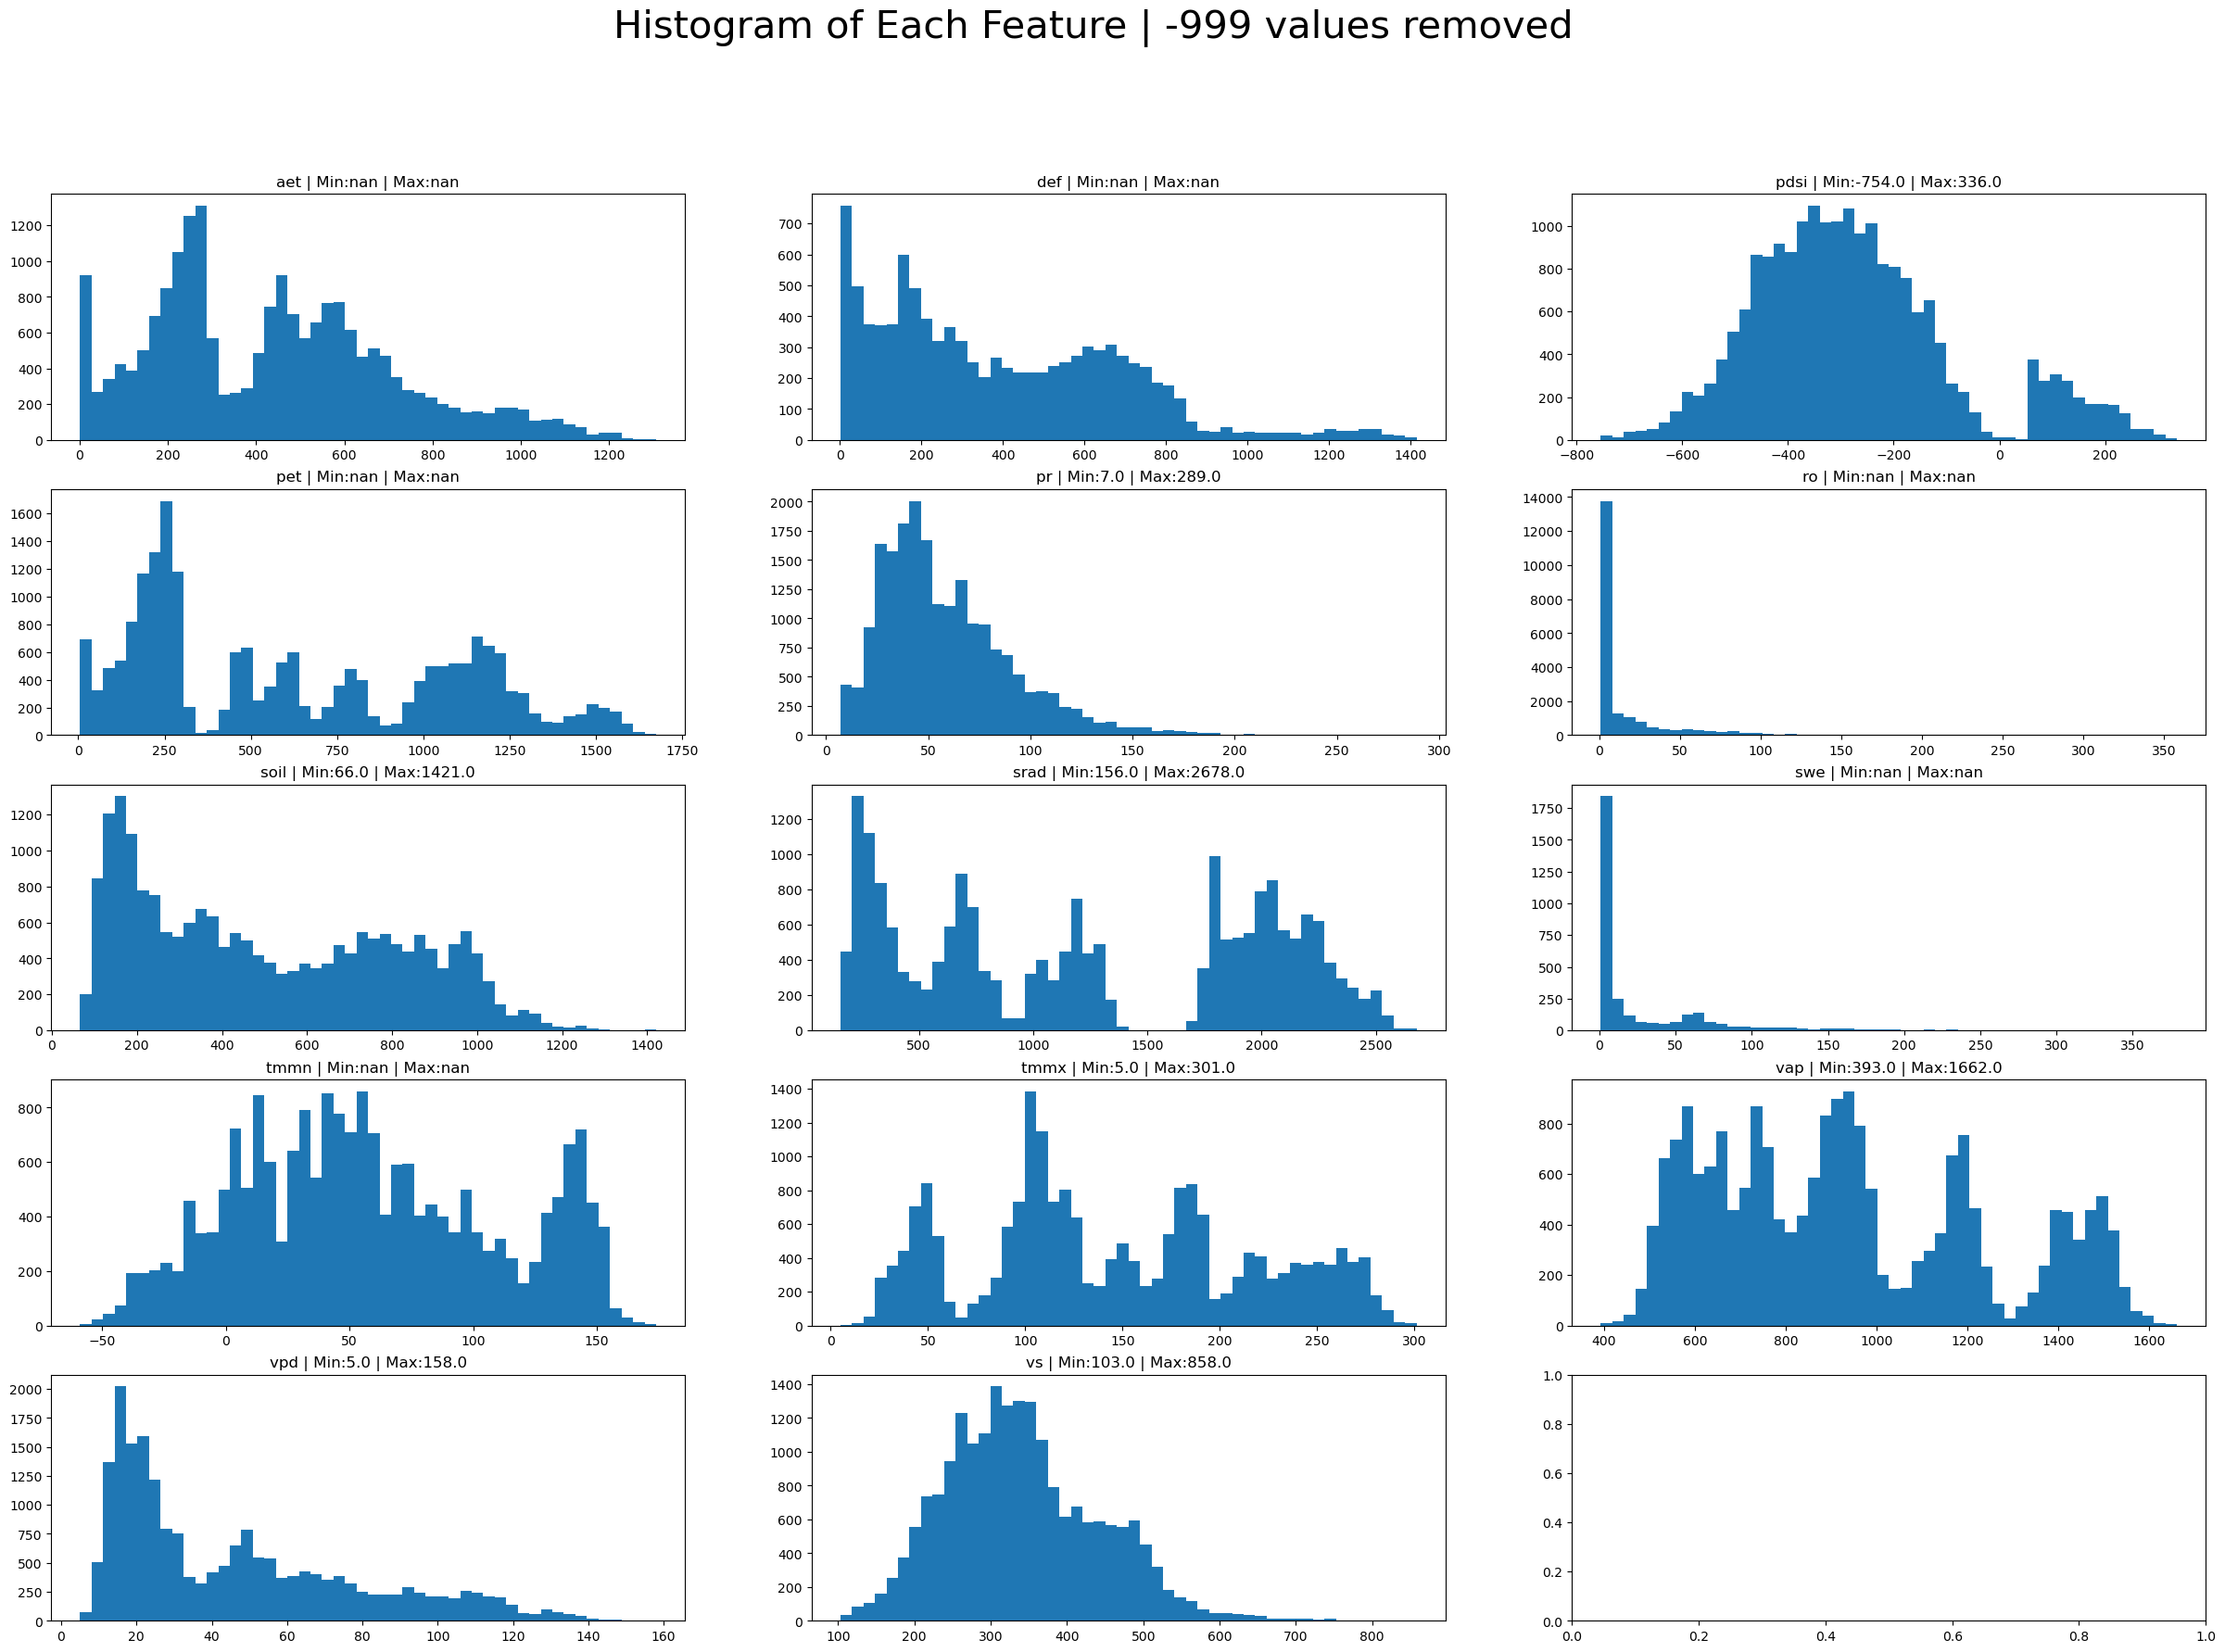

In [65]:
vals_list = []
nans_list = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df = df.iloc[:, 1:13]
    df = df.replace(-999, np.nan)
    nan_per_column = df.isna().sum()
    vals = df.values.reshape(-1)
    vals_list.append(vals)
    nans_list.append(nan_per_column.values)
len(vals_list)


# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(30, 20))

# Loop through each array and plot its histogram in a different subplot
for i in range(len(vals_list)):
    ax = axs[i // 3, i % 3]  # Select the appropriate subplot
    ax.hist(vals_list[i], bins=50)  # Create the histogram in the subplot
    ax.set_title(f'{feature_names[i]} | Min:{np.min(vals_list[i])} | Max:{np.max(vals_list[i])}')  # Add a title to the subplot

# Add a global title and show the plot
fig.suptitle('Histogram of Each Feature | -999 values removed', fontsize=30)
plt.show()

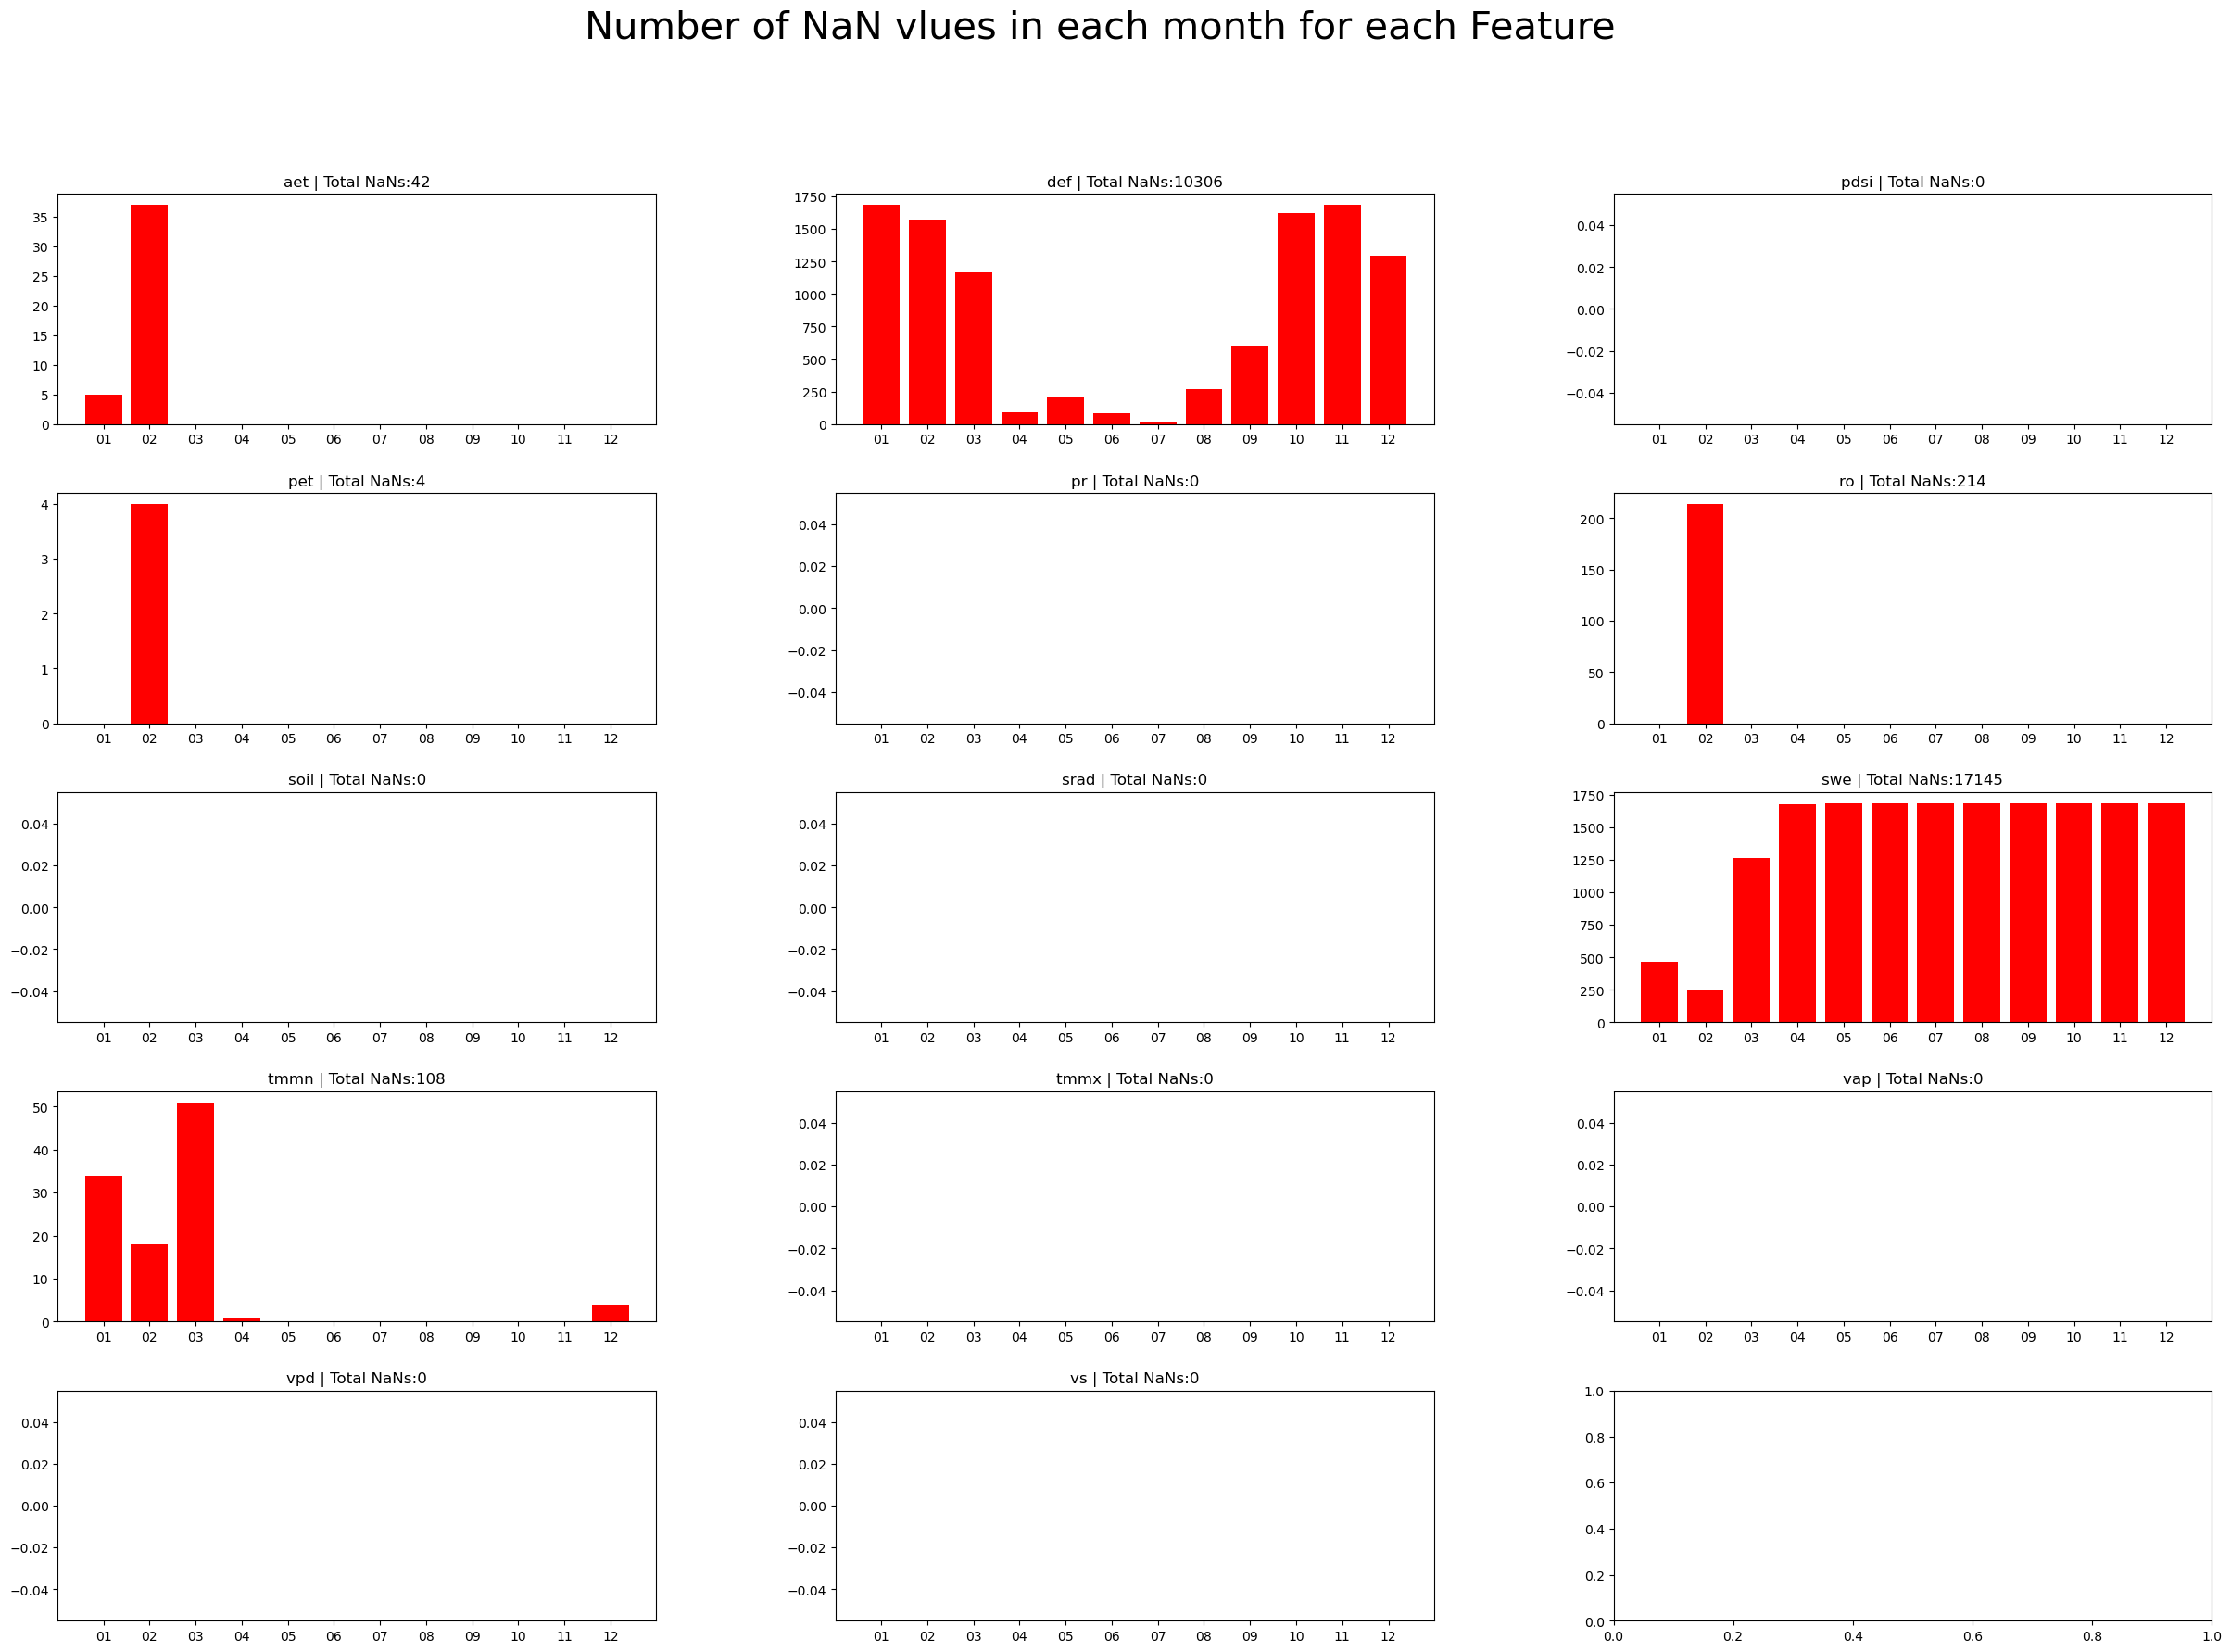

In [90]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(30, 20))

# Loop through each array and plot its histogram in a different subplot
for i in range(len(nans_list)):
    ax = axs[i // 3, i % 3]  # Select the appropriate subplot
    ax.bar(dates, nans_list[i], color='red')  # Create the histogram in the subplot
    ax.set_title(f'{feature_names[i]} | Total NaNs:{np.min(nans_list[i].sum())}')  # Add a title to the subplot
    ax.set_xticks(range(len(dates)))
    dates_wo_year = [f"{x[4:6]}" for x in dates]
    ax.set_xticklabels(dates_wo_year, rotation=0)
# Add a global title and show the plot
plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle('Number of NaN vlues in each month for each Feature', fontsize=30)
plt.show()

In [ ]:
df = pd.read_csv(csv_files[0])
df = df.iloc[:, 1:13]
df = df.replace(-999, np.nan)
nan_per_column = df.isna().sum()
nan_per_column.values

array([ 5, 37,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

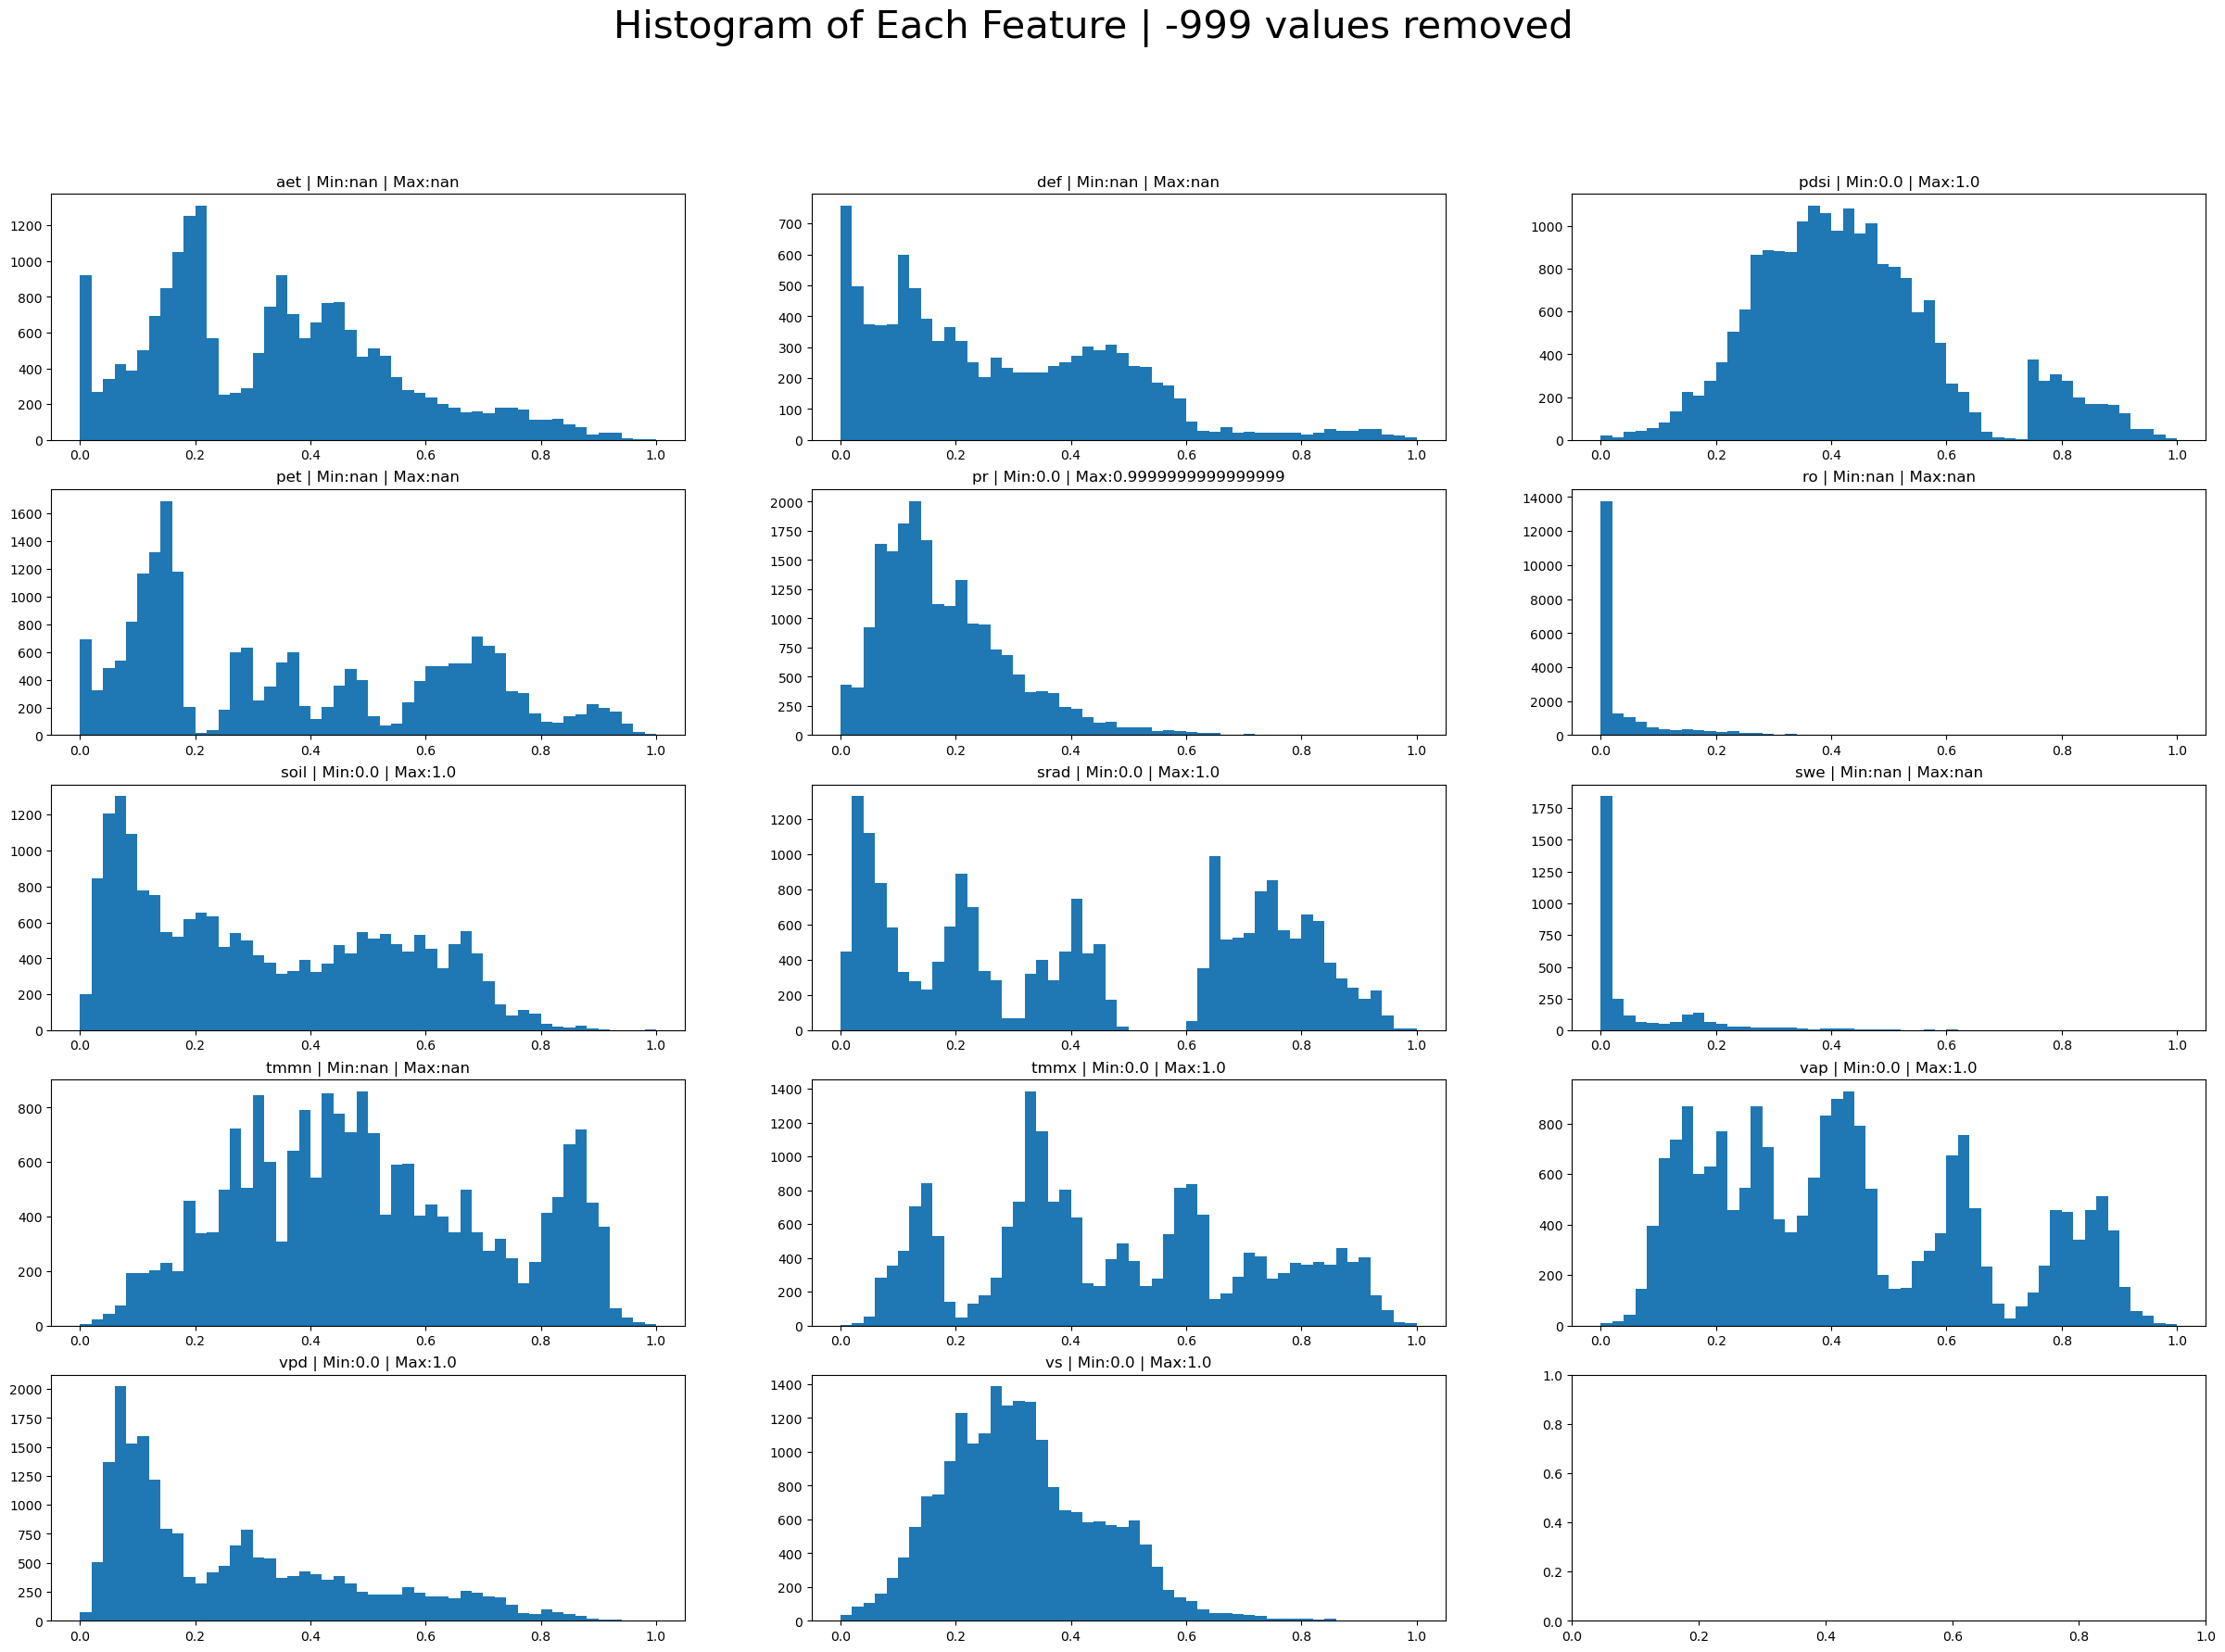

In [ ]:
vals_list = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df = df.iloc[:, 1:13]
    df = df.replace(-999, np.nan)
    vals = df.values.reshape(-1)
    mm = MinMaxScaler()
    mm.fit(vals.reshape(-1, 1))
    vals= mm.transform(vals.reshape(-1, 1))
    vals = vals.reshape(-1)
    vals_list.append(vals)
len(vals_list)


# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(30, 20))

# Loop through each array and plot its histogram in a different subplot
for i in range(len(vals_list)):
    ax = axs[i // 3, i % 3]  # Select the appropriate subplot
    ax.hist(vals_list[i], bins=50)  # Create the histogram in the subplot
    ax.set_title(f'{feature_names[i]} | Min:{np.min(vals_list[i])} | Max:{np.max(vals_list[i])}')  # Add a title to the subplot

# Add a global title and show the plot
fig.suptitle('Histogram of Each Feature | -999 values removed', fontsize=30)
plt.show()